## Прогнозирование матчей в Dota 2. EDA

Описание всех данных: https://github.com/vladislavv17/hse_ai_dota2_match_forecast/blob/kitsuyome-patch-1/data_description.md

### Базовая информация

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('data.csv')

/var/folders/h9/0y8pddws5r74cd3l8tn5h53m0000gn/T/ipykernel_10431/2948258669.py:1: DtypeWarning: Columns (1311) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


Изучим базовую информацию о данных

In [7]:
display(data.info())

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191967 entries, 0 to 191966
Columns: 1437 entries, Unnamed: 0 to radiant_xp_adv_124
dtypes: bool(50), float64(1147), int64(208), object(32)
memory usage: 2.0+ GB


None

,Unnamed: 0,radiant_gold_adv_0,radiant_gold_adv_1,radiant_gold_adv_2,radiant_gold_adv_3,radiant_gold_adv_4,radiant_gold_adv_5,radiant_gold_adv_6,radiant_gold_adv_7,radiant_gold_adv_8,...,radiant_xp_adv_115,radiant_xp_adv_116,radiant_xp_adv_117,radiant_xp_adv_118,radiant_xp_adv_119,radiant_xp_adv_120,radiant_xp_adv_121,radiant_xp_adv_122,radiant_xp_adv_123,radiant_xp_adv_124
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Появился лишний столбец "Unnamed: 0", можно избавляться сразу при загрузке, но сейчас удалим так:

In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)

Проверим 

In [9]:
data.sample(5)

,radiant_gold_adv_0,radiant_gold_adv_1,radiant_gold_adv_2,radiant_gold_adv_3,radiant_gold_adv_4,radiant_gold_adv_5,radiant_gold_adv_6,radiant_gold_adv_7,radiant_gold_adv_8,radiant_gold_adv_9,...,radiant_xp_adv_115,radiant_xp_adv_116,radiant_xp_adv_117,radiant_xp_adv_118,radiant_xp_adv_119,radiant_xp_adv_120,radiant_xp_adv_121,radiant_xp_adv_122,radiant_xp_adv_123,radiant_xp_adv_124
190676,-454.0,-1099.0,-1915.0,-1783.0,-1727.0,-2374.0,-2603.0,-4077.0,-3651.0,-5617.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89386,0.0,-837.0,-1564.0,-2073.0,-3004.0,-3066.0,-3468.0,-4653.0,-5779.0,-6291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123947,0.0,-103.0,-789.0,-540.0,-599.0,32.0,947.0,726.0,690.0,859.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93709,0.0,-201.0,-195.0,-426.0,46.0,-299.0,335.0,121.0,539.0,-31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66751,500.0,735.0,508.0,804.0,480.0,674.0,722.0,621.0,1295.0,1025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Размер датасета:", data.shape)

Размер датасета: (191967, 1436)


### Пропуски

In [11]:
missing_counts = data.isnull().sum()
missing_cols = missing_counts[missing_counts > 0].sort_values(ascending=False)
print("Количество пропущенных значений по столбцам:")
missing_cols

Количество пропущенных значений по столбцам:


180_50        191967
180_136       191967
180_134       191967
180_133       191967
180_132       191967
               ...  
total_xp_8         2
total_xp_0         2
total_xp_3         1
total_xp_5         1
total_xp_6         1
Length: 1168, dtype: int64

В 1168 столбцах есть пропуски, что вполне может быть нормой для данных. Например, игра не дошла до определенной минуты, к которой относится данный столбец в данных

Чтобы убедиться, что с данными действительно все в порядке, рассмотрим наш таргет. Была ли зафиксирована победа одной из команд (True - если победа Radiant, False - победа Dire). Пропусков быть не может, потому что обязательно должен быть победитель

In [12]:
data['radiant_win'].isna().sum()

np.int64(0)

Видим, что все ок

В то же время есть один нюанс, который стоит проверить здесь. В Доте может быть довольно много режимов игры, но нас интересует только классический матч 5х5 (10 игроков). На этом этапе можно посмотреть, какие столбцы имеют только пропуски - это значит, что это не наш режим игры и можно смело от этого избавляться

In [13]:
(missing_cols / data.shape[0]).head(20)

180_50     1.0
180_136    1.0
180_134    1.0
180_133    1.0
180_132    1.0
180_131    1.0
180_130    1.0
180_129    1.0
180_128    1.0
180_127    1.0
180_126    1.0
180_125    1.0
180_124    1.0
180_123    1.0
180_122    1.0
180_121    1.0
180_120    1.0
180_119    1.0
180_118    1.0
180_117    1.0
dtype: float64

Видим, что таких столбцов достаточно. И как раз указатели - с 10 (то есть 11-й индекс, 11 игрок), чего у нас не будет. Удалим ниже в предобработке

## Предобработка

Продолжим с той же проблемой. Выведем все столбцы, которые заканчиваются на 10 или 11, посмотрим, все ли они состоят из пропусков. Можно это назвать ошибочными данными для нашей задачи и удалить их

In [35]:
filtered_columns = [col for col in data.columns if col.endswith("10") or col.endswith("11")]

filtered_columns

['radiant_gold_adv_10',
 'radiant_gold_adv_11',
 'radiant_gold_adv_110',
 'radiant_gold_adv_111',
 'draft_order_10',
 'draft_pick_10',
 'draft_active_team_10',
 'draft_hero_id_10',
 'draft_extra_time_10',
 'draft_total_time_taken_10',
 'draft_pick_11',
 'isRadiant_10',
 'isRadiant_11',
 'is_roaming_10',
 'is_roaming_11',
 'radiant_xp_adv_10',
 'radiant_xp_adv_11',
 'radiant_xp_adv_110',
 'radiant_xp_adv_111']

К нам попали столбцы, которые отвечают могут указать не за показатель игрока, такие нам нужно оставить. Посмотрим на процент пропусков опять только для этих столбцов и удалим те, которые полностью состоят из пропусков

In [15]:
print(f"До удаления: {data.shape}")

filtered_columns = [col for col in data.columns if col.endswith("10") or col.endswith("11")]

missing_percentages = data[filtered_columns].isnull().sum() / len(data) * 100

# Определяем столбцы, полностью состоящие из пропусков (100% пропусков)
columns_to_drop = missing_percentages[missing_percentages == 100].index.tolist()

# Удаляем эти столбцы из DataFrame
data = data.drop(columns=columns_to_drop)

print(f"После удаления: {data.shape}")

До удаления: (191967, 1436)
После удаления: (191967, 1305)


Удалили ненужные столбцы! 

Помимо этого, в данных есть несколько проблем:
1. Некоторые показатели, которые лучше рассматривать в минутах, указаны в секундах. Переведем
2. При извлечении данных возникли некоторые проблемы с наименованием столбцов. В данных появились столбцы вида "180_0" и так далее до «180_179». Это, на самом деле, radiant_xp_adv_i, где i - минута игры

Впишем это сюда, чтобы не начинать процесс склеивания данных заново

Начнем с перевода в минуты. У нас есть два таких столбца: duration (длительность) и first_blood_time (время первой крови). Интереснее это смотреть в минутах

In [16]:
data['duration_in_min'] = data['duration'] / 60
data['first_blood_time_in_min'] = data['first_blood_time'] / 60

In [17]:
# Переименование всех столбцов, начинающихся с "180_"
data.columns = data.columns.str.replace(r'^180_', 'radiant_xp_adv_', regex=True)

С предобработкой все

## Изучение данных

In [18]:
# Функция для получения списка столбцов, начинающихся с заданного префикса
def get_columns_by_prefix(df, prefix):
    return [col for col in df.columns if col.startswith(prefix)]

In [22]:
# Определим основные группы
groups = {
    "radiant_gold_adv": get_columns_by_prefix(data, "radiant_gold_adv_"),
    "radiant_xp_adv": get_columns_by_prefix(data, "radiant_xp_adv_"),
    "draft": get_columns_by_prefix(data, "draft_"),
    "player_slot": get_columns_by_prefix(data, "player_slot_"),
    "account_id": get_columns_by_prefix(data, "account_id_"),
    "assists": get_columns_by_prefix(data, "assists_"),
    "camps_stacked": get_columns_by_prefix(data, "camps_stacked_"),
    "deaths": get_columns_by_prefix(data, "deaths_"),
    "denies": get_columns_by_prefix(data, "denies_"),
    "gold": get_columns_by_prefix(data, "gold_"),
    "gold_per_min": get_columns_by_prefix(data, "gold_per_min_"),
    "gold_spent": get_columns_by_prefix(data, "gold_spent_"),
    "hero_damage": get_columns_by_prefix(data, "hero_damage_"),
    "hero_healing": get_columns_by_prefix(data, "hero_healing_"),
    "hero_id": get_columns_by_prefix(data, "hero_id_"),
    "item_0": get_columns_by_prefix(data, "item_0_"),
    "item_1": get_columns_by_prefix(data, "item_1_"),
    "item_2": get_columns_by_prefix(data, "item_2_"),
    "item_3": get_columns_by_prefix(data, "item_3_"),
    "item_4": get_columns_by_prefix(data, "item_4_"),
    "item_5": get_columns_by_prefix(data, "item_5_"),
    "kills": get_columns_by_prefix(data, "kills_"),
    "last_hits": get_columns_by_prefix(data, "last_hits_"),
    "leaver_status": get_columns_by_prefix(data, "leaver_status_"),
    "level": get_columns_by_prefix(data, "level_"),
    "obs_placed": get_columns_by_prefix(data, "obs_placed_"),
    "party_id": get_columns_by_prefix(data, "party_id_"),
    "hero_variant": get_columns_by_prefix(data, "hero_variant_"),
    "pings": get_columns_by_prefix(data, "pings_"),
    "rune_pickups": get_columns_by_prefix(data, "rune_pickups_"),
    "sen_placed": get_columns_by_prefix(data, "sen_placed_"),
    "stuns": get_columns_by_prefix(data, "stuns_"),
    "tower_damage": get_columns_by_prefix(data, "tower_damage_"),
    "xp_per_min": get_columns_by_prefix(data, "xp_per_min_"),
    "personaname": get_columns_by_prefix(data, "personaname_"),
    "name": get_columns_by_prefix(data, "name_"),
    "last_login": get_columns_by_prefix(data, "last_login_"),
    "isRadiant": get_columns_by_prefix(data, "isRadiant_"),
    "total_gold": get_columns_by_prefix(data, "total_gold_"),
    "total_xp": get_columns_by_prefix(data, "total_xp_"),
    "kills_per_min": get_columns_by_prefix(data, "kills_per_min_"),
    "kda": get_columns_by_prefix(data, "kda_"),
    "abandons": get_columns_by_prefix(data, "abandons_"),
    "neutral_kills": get_columns_by_prefix(data, "neutral_kills_"),
    "tower_kills": get_columns_by_prefix(data, "tower_kills_"),
    "courier_kills": get_columns_by_prefix(data, "courier_kills_"),
    "lane_kills": get_columns_by_prefix(data, "lane_kills_"),
    "hero_kills": get_columns_by_prefix(data, "hero_kills_"),
    "observer_kills": get_columns_by_prefix(data, "observer_kills_"),
    "sentry_kills": get_columns_by_prefix(data, "sentry_kills_"),
    "roshan_kills": get_columns_by_prefix(data, "roshan_kills_"),
    "necronomicon_kills": get_columns_by_prefix(data, "necronomicon_kills_"),
    "ancient_kills": get_columns_by_prefix(data, "ancient_kills_"),
    "buyback_count": get_columns_by_prefix(data, "buyback_count_"),
    "observer_uses": get_columns_by_prefix(data, "observer_uses_"),
    "sentry_uses": get_columns_by_prefix(data, "sentry_uses_"),
    "lane_efficiency": get_columns_by_prefix(data, "lane_efficiency_"),
    "lane_efficiency_pct": get_columns_by_prefix(data, "lane_efficiency_pct_"),
    "lane": get_columns_by_prefix(data, "lane_"),
    "lane_role": get_columns_by_prefix(data, "lane_role_"),
    "is_roaming": get_columns_by_prefix(data, "is_roaming_"),
    "purchase_tpscroll": get_columns_by_prefix(data, "purchase_tpscroll_"),
    "actions_per_min": get_columns_by_prefix(data, "actions_per_min_"),
    "life_state_dead": get_columns_by_prefix(data, "life_state_dead_"),
    "rank_tier": get_columns_by_prefix(data, "rank_tier_")
}

general_columns = [col for col in data.columns if col not in sum(list(groups.values()), [])]
print("\n[INFO] Обнаружено следующих общих столбцов (без префиксной группировки):")
print(general_columns)
general_df = data[general_columns]


[INFO] Обнаружено следующих общих столбцов (без префиксной группировки):
['match_id', 'barracks_status_dire', 'barracks_status_radiant', 'cluster', 'dire_score', 'duration', 'engine', 'first_blood_time', 'game_mode', 'human_players', 'leagueid', 'lobby_type', 'match_seq_num', 'negative_votes', 'positive_votes', 'radiant_score', 'radiant_win', 'start_time', 'tower_status_dire', 'tower_status_radiant', 'version', 'replay_salt', 'series_id', 'series_type', 'skill', 'patch', 'region', 'throw', 'comeback', 'loss', 'win', 'replay_url', 'duration_in_min', 'first_blood_time_in_min']


Изучим сперва такие группы пропусков, связанные между собой, отобранных выше

In [47]:
def process_group(df, group_name, columns, agg_funcs=['mean', 'median', 'std']):
    """
    Обрабатывает группу столбцов: выводит описательную статистику,
    строит графики распределения агрегированных значений и сохраняет результаты.
    """
    print(f"\n----- Группа: {group_name} -----")
    if not columns:
        print(f"[WARN] Группа {group_name} пуста.")
        return None

    # Вычислим описательную статистику для группы
    group_desc = df[columns].describe()
    
    display(group_desc)

for group_name, cols in groups.items():
    df = process_group(data, group_name, cols)


----- Группа: radiant_gold_adv -----


,radiant_gold_adv_0,radiant_gold_adv_1,radiant_gold_adv_2,radiant_gold_adv_3,radiant_gold_adv_4,radiant_gold_adv_5,radiant_gold_adv_6,radiant_gold_adv_7,radiant_gold_adv_8,radiant_gold_adv_9,...,radiant_gold_adv_170,radiant_gold_adv_171,radiant_gold_adv_172,radiant_gold_adv_173,radiant_gold_adv_174,radiant_gold_adv_175,radiant_gold_adv_176,radiant_gold_adv_177,radiant_gold_adv_178,radiant_gold_adv_179
count,161628.000000,161628.000000,161628.000000,161628.000000,161628.000000,161628.000000,161628.000000,161569.000000,161473.000000,161347.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6.701933,-8.451425,-2.702997,2.424456,4.113068,10.276171,17.277829,20.395658,23.003437,30.767805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,221.022964,464.580439,588.352464,722.216368,910.493774,1111.254341,1349.904759,1659.041601,1952.473952,2285.901848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-2637.000000,-4928.000000,-6069.000000,-7470.000000,-8902.000000,-10677.000000,-13396.000000,-16459.000000,-19047.000000,-20325.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,-304.000000,-377.000000,-460.000000,-577.000000,-691.000000,-827.000000,-1009.000000,-1182.000000,-1382.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,-1.000000,-3.000000,0.000000,3.000000,9.000000,13.000000,9.000000,8.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,267.000000,369.000000,462.000000,581.000000,706.000000,856.000000,1043.000000,1226.000000,1441.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2235.000000,3120.000000,4684.000000,6460.000000,8586.000000,10168.000000,14255.000000,15645.000000,18764.000000,22359.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----- Группа: radiant_xp_adv -----


,radiant_xp_adv_0,radiant_xp_adv_0,radiant_xp_adv_1,radiant_xp_adv_1,radiant_xp_adv_2,radiant_xp_adv_2,radiant_xp_adv_3,radiant_xp_adv_3,radiant_xp_adv_4,radiant_xp_adv_4,...,radiant_xp_adv_120,radiant_xp_adv_120,radiant_xp_adv_121,radiant_xp_adv_121,radiant_xp_adv_122,radiant_xp_adv_122,radiant_xp_adv_123,radiant_xp_adv_123,radiant_xp_adv_124,radiant_xp_adv_124
count,0.0,161628.000000,0.0,161628.000000,0.0,161628.000000,0.0,161628.000000,0.0,161628.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
mean,NaN,1.580098,NaN,49.260815,NaN,40.696618,NaN,31.623735,NaN,38.432159,...,NaN,3079.0,NaN,2987.0,NaN,2904.0,NaN,2904.0,NaN,2744.0
std,NaN,56.024953,NaN,183.220036,NaN,299.727380,NaN,419.726522,NaN,597.179476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-767.000000,NaN,-1723.000000,NaN,-3005.000000,NaN,-4871.000000,NaN,-7077.000000,...,NaN,3079.0,NaN,2987.0,NaN,2904.0,NaN,2904.0,NaN,2744.0
25%,NaN,0.000000,NaN,-71.000000,NaN,-149.000000,NaN,-228.000000,NaN,-332.000000,...,NaN,3079.0,NaN,2987.0,NaN,2904.0,NaN,2904.0,NaN,2744.0
50%,NaN,0.000000,NaN,51.000000,NaN,41.000000,NaN,31.000000,NaN,36.000000,...,NaN,3079.0,NaN,2987.0,NaN,2904.0,NaN,2904.0,NaN,2744.0
75%,NaN,0.000000,NaN,171.000000,NaN,231.000000,NaN,290.000000,NaN,406.000000,...,NaN,3079.0,NaN,2987.0,NaN,2904.0,NaN,2904.0,NaN,2744.0
max,NaN,645.000000,NaN,1408.000000,NaN,3060.000000,NaN,4622.000000,NaN,6550.000000,...,NaN,3079.0,NaN,2987.0,NaN,2904.0,NaN,2904.0,NaN,2744.0



----- Группа: draft -----


,draft_order_0,draft_active_team_0,draft_hero_id_0,draft_player_slot_0,draft_extra_time_0,draft_total_time_taken_0,draft_order_1,draft_active_team_1,draft_hero_id_1,draft_player_slot_1,...,draft_hero_id_23,draft_player_slot_23,draft_extra_time_23,draft_total_time_taken_23,draft_order_24,draft_active_team_24,draft_hero_id_24,draft_player_slot_24,draft_extra_time_24,draft_total_time_taken_24
count,0.0,0.0,0.0,0.0,0.0,0.0,131953.0,131953.0,131953.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,67.322827,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,36.000959,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,38.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,93.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,138.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----- Группа: player_slot -----


,player_slot_0,player_slot_1,player_slot_2,player_slot_3,player_slot_4,player_slot_5,player_slot_6,player_slot_7,player_slot_8,player_slot_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,0.000198,1.000401,2.000589,3.000849,4.130481,128.001271,129.001406,130.001646,131.001860,131.861299
std,0.014068,0.020024,0.024255,0.029127,4.020283,0.035629,0.037477,0.040539,0.043084,4.213606
min,0.000000,1.000000,2.000000,3.000000,4.000000,128.000000,129.000000,130.000000,131.000000,0.000000
25%,0.000000,1.000000,2.000000,3.000000,4.000000,128.000000,129.000000,130.000000,131.000000,132.000000
50%,0.000000,1.000000,2.000000,3.000000,4.000000,128.000000,129.000000,130.000000,131.000000,132.000000
75%,0.000000,1.000000,2.000000,3.000000,4.000000,128.000000,129.000000,130.000000,131.000000,132.000000
max,1.000000,2.000000,3.000000,4.000000,128.000000,129.000000,130.000000,131.000000,132.000000,132.000000



----- Группа: account_id -----


,account_id_0,account_id_1,account_id_2,account_id_3,account_id_4,account_id_5,account_id_6,account_id_7,account_id_8,account_id_9
count,1.268920e+05,1.228210e+05,1.236230e+05,1.237880e+05,1.237730e+05,1.270290e+05,1.225920e+05,1.228940e+05,1.233780e+05,1.235750e+05
mean,2.604806e+08,3.063003e+08,3.032100e+08,2.949714e+08,2.892487e+08,2.616338e+08,3.064648e+08,3.020764e+08,2.955080e+08,2.905646e+08
std,2.736370e+08,3.143304e+08,3.086026e+08,2.991712e+08,2.941964e+08,2.749221e+08,3.138721e+08,3.080410e+08,3.018078e+08,2.954581e+08
min,1.974400e+04,1.974400e+04,1.974400e+04,1.974400e+04,1.974400e+04,1.974400e+04,1.974400e+04,1.974400e+04,1.974400e+04,1.974400e+04
25%,1.013255e+08,1.131525e+08,1.131120e+08,1.124269e+08,1.106016e+08,1.013569e+08,1.134352e+08,1.131120e+08,1.121628e+08,1.105834e+08
50%,1.538362e+08,1.789508e+08,1.786926e+08,1.758917e+08,1.734805e+08,1.535816e+08,1.792843e+08,1.783628e+08,1.749886e+08,1.734762e+08
75%,3.022140e+08,3.483230e+08,3.474453e+08,3.418744e+08,3.340449e+08,3.036737e+08,3.487036e+08,3.464124e+08,3.399784e+08,3.375757e+08
max,1.843088e+09,1.835431e+09,1.836880e+09,1.857657e+09,1.843127e+09,1.836880e+09,1.860986e+09,1.837037e+09,1.836880e+09,1.822920e+09



----- Группа: assists -----


,assists_0,assists_1,assists_2,assists_3,assists_4,assists_5,assists_6,assists_7,assists_8,assists_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,12.354900,12.951377,12.747509,12.595696,12.464012,12.416197,12.997166,12.827486,12.636109,12.499310
std,7.480976,7.615844,7.581607,7.530148,7.507587,7.641602,7.820916,7.781785,7.721898,7.690961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000
50%,11.000000,12.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12.000000,12.000000,12.000000
75%,17.000000,18.000000,18.000000,17.000000,17.000000,17.000000,18.000000,18.000000,18.000000,17.000000
max,60.000000,57.000000,67.000000,57.000000,56.000000,60.000000,58.000000,57.000000,61.000000,59.000000



----- Группа: camps_stacked -----


,camps_stacked_0,camps_stacked_1,camps_stacked_2,camps_stacked_3,camps_stacked_4,camps_stacked_5,camps_stacked_6,camps_stacked_7,camps_stacked_8,camps_stacked_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,1.464424,1.443549,1.442546,1.432963,1.435109,1.627655,1.610081,1.611535,1.606313,1.606474
std,1.835121,1.861283,1.853718,1.830693,1.826955,1.972393,1.977053,1.979424,1.982047,1.972661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,19.000000,25.000000,20.000000,22.000000,24.000000,21.000000,23.000000,30.000000,27.000000,25.000000



----- Группа: deaths -----


,deaths_0,deaths_1,deaths_2,deaths_3,deaths_4,deaths_5,deaths_6,deaths_7,deaths_8,deaths_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,5.935400,6.656113,6.494835,6.332166,6.187558,5.930342,6.661833,6.489053,6.305928,6.174968
std,3.719126,3.906792,3.864543,3.812868,3.779979,3.645341,3.835981,3.794426,3.732580,3.703099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,8.000000
max,30.000000,32.000000,41.000000,38.000000,31.000000,29.000000,31.000000,41.000000,27.000000,29.000000



----- Группа: denies -----


,denies_0,denies_1,denies_2,denies_3,denies_4,denies_5,denies_6,denies_7,denies_8,denies_9
count,191967.000000,191967.000000,191967.000000,191967.00000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,7.857861,6.063125,6.421286,6.78812,7.116301,7.678565,5.933145,6.267885,6.655232,6.952330
std,6.735480,6.025212,6.129336,6.28057,6.393265,6.632154,5.934482,6.020462,6.171681,6.300514
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
50%,6.000000,4.000000,5.000000,5.00000,5.000000,6.000000,4.000000,4.000000,5.000000,5.000000
75%,11.000000,9.000000,9.000000,10.00000,10.000000,11.000000,8.000000,9.000000,10.000000,10.000000
max,140.000000,108.000000,95.000000,89.00000,108.000000,100.000000,90.000000,90.000000,130.000000,103.000000



----- Группа: gold -----


,gold_0,gold_1,gold_2,gold_3,gold_4,gold_5,gold_6,gold_7,gold_8,gold_9,...,gold_spent_0,gold_spent_1,gold_spent_2,gold_spent_3,gold_spent_4,gold_spent_5,gold_spent_6,gold_spent_7,gold_spent_8,gold_spent_9
count,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184726.000000,...,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184726.000000
mean,1761.646949,1648.046057,1674.399309,1691.662520,1714.360563,1772.417978,1651.028093,1675.285861,1706.056938,1719.536064,...,15480.682467,13517.964515,13967.113259,14382.802333,14771.321416,15655.123024,13657.701704,14098.751564,14566.233163,14880.673186
std,1519.523050,1391.702466,1418.833029,1439.349411,1468.414922,1564.805269,1418.925614,1450.825704,1482.448090,1508.496256,...,7905.614489,7087.716180,7236.960063,7436.975595,7661.100520,8262.039930,7275.741711,7371.152469,7676.309027,7793.450532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,710.000000,675.000000,684.000000,687.000000,694.500000,697.000000,665.500000,671.000000,678.000000,680.000000,...,9565.000000,8470.000000,8742.500000,9005.000000,9210.000000,9550.000000,8500.000000,8735.000000,9025.000000,9160.000000
50%,1351.000000,1281.000000,1296.000000,1305.000000,1318.000000,1334.000000,1262.000000,1273.000000,1299.000000,1302.000000,...,14085.000000,12070.000000,12560.000000,12970.000000,13345.000000,14175.000000,12210.000000,12650.000000,13105.000000,13460.000000
75%,2360.000000,2223.000000,2251.000000,2278.000000,2312.000000,2372.000000,2222.000000,2256.000000,2291.000000,2307.000000,...,20110.000000,17185.000000,17865.000000,18485.000000,19037.500000,20415.000000,17440.000000,18165.000000,18810.000000,19345.000000
max,19162.000000,27565.000000,22059.000000,25166.000000,64160.000000,26836.000000,26353.000000,25463.000000,26256.000000,34273.000000,...,129730.000000,226080.000000,243695.000000,371365.000000,324525.000000,333240.000000,307780.000000,186820.000000,373290.000000,260665.000000



----- Группа: gold_per_min -----


,gold_per_min_0,gold_per_min_1,gold_per_min_2,gold_per_min_3,gold_per_min_4,gold_per_min_5,gold_per_min_6,gold_per_min_7,gold_per_min_8,gold_per_min_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,502.496023,445.153578,458.553626,470.499789,481.520386,504.824189,447.388223,460.316784,473.578448,483.271583
std,174.166940,158.553358,161.278925,164.139999,167.536814,178.003968,161.701203,164.764733,168.029729,170.791453
min,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
25%,363.000000,325.000000,334.000000,342.000000,350.000000,363.000000,325.000000,334.000000,343.000000,349.000000
50%,490.000000,416.000000,434.000000,450.000000,463.000000,490.000000,418.000000,434.000000,452.000000,464.000000
75%,629.000000,552.000000,570.000000,586.000000,601.000000,633.000000,555.000000,573.000000,590.000000,603.000000
max,1689.000000,1251.000000,1808.000000,2242.000000,1393.000000,1430.000000,1760.000000,2419.000000,2473.000000,2054.000000



----- Группа: gold_spent -----


,gold_spent_0,gold_spent_1,gold_spent_2,gold_spent_3,gold_spent_4,gold_spent_5,gold_spent_6,gold_spent_7,gold_spent_8,gold_spent_9
count,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184726.000000
mean,15480.682467,13517.964515,13967.113259,14382.802333,14771.321416,15655.123024,13657.701704,14098.751564,14566.233163,14880.673186
std,7905.614489,7087.716180,7236.960063,7436.975595,7661.100520,8262.039930,7275.741711,7371.152469,7676.309027,7793.450532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9565.000000,8470.000000,8742.500000,9005.000000,9210.000000,9550.000000,8500.000000,8735.000000,9025.000000,9160.000000
50%,14085.000000,12070.000000,12560.000000,12970.000000,13345.000000,14175.000000,12210.000000,12650.000000,13105.000000,13460.000000
75%,20110.000000,17185.000000,17865.000000,18485.000000,19037.500000,20415.000000,17440.000000,18165.000000,18810.000000,19345.000000
max,129730.000000,226080.000000,243695.000000,371365.000000,324525.000000,333240.000000,307780.000000,186820.000000,373290.000000,260665.000000



----- Группа: hero_damage -----


,hero_damage_0,hero_damage_1,hero_damage_2,hero_damage_3,hero_damage_4,hero_damage_5,hero_damage_6,hero_damage_7,hero_damage_8,hero_damage_9
count,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184726.000000
mean,21885.659655,18942.614594,19494.580955,20006.137425,20546.920558,21934.332519,18925.503729,19517.111320,20148.846257,20573.280838
std,14507.288135,12624.487531,12930.410449,13209.654010,13606.114663,14811.649308,12783.537394,13194.324788,13553.189972,13863.955926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11642.000000,10266.000000,10566.500000,10826.000000,11083.000000,11436.000000,10147.000000,10403.000000,10723.000000,10871.000000
50%,18512.000000,15892.000000,16402.000000,16879.000000,17369.000000,18413.000000,15829.000000,16330.000000,16920.000000,17303.500000
75%,28553.000000,24272.000000,25064.500000,25813.000000,26552.000000,28771.000000,24292.000000,25153.000000,26135.000000,26829.750000
max,219044.000000,182125.000000,217686.000000,191964.000000,278624.000000,275853.000000,218334.000000,280343.000000,178800.000000,178109.000000



----- Группа: hero_healing -----


,hero_healing_0,hero_healing_1,hero_healing_2,hero_healing_3,hero_healing_4,hero_healing_5,hero_healing_6,hero_healing_7,hero_healing_8,hero_healing_9
count,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184726.000000
mean,916.560109,1100.534161,1046.474521,1003.471325,948.894876,945.014921,1120.153467,1057.242305,1018.718748,965.909141
std,2845.537747,3068.517225,3002.757048,2957.684316,2831.532293,2930.223986,3145.120035,3067.546783,3020.053066,2920.884931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,250.000000,400.000000,400.000000,376.000000,320.000000,252.000000,400.000000,400.000000,365.000000,316.000000
max,59625.000000,88535.000000,76045.000000,76304.000000,75224.000000,70579.000000,63999.000000,81818.000000,88163.000000,81409.000000



----- Группа: hero_id -----


,hero_id_0,hero_id_1,hero_id_2,hero_id_3,hero_id_4,hero_id_5,hero_id_6,hero_id_7,hero_id_8,hero_id_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,64.837738,66.589164,66.259404,66.124037,65.655628,64.951627,66.700449,66.462611,65.988185,65.788886
std,39.198289,39.238373,39.263730,39.357819,39.315707,39.263374,39.229490,39.252236,39.303613,39.304838
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,31.000000,31.000000,31.000000,31.000000,30.000000,32.000000,31.000000,31.000000,31.000000
50%,64.000000,66.000000,65.000000,65.000000,65.000000,64.000000,66.000000,66.000000,65.000000,65.000000
75%,98.000000,100.000000,99.000000,99.000000,98.000000,98.000000,100.000000,99.000000,98.000000,98.000000
max,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000



----- Группа: item_0 -----


,item_0_0,item_0_1,item_0_2,item_0_3,item_0_4,item_0_5,item_0_6,item_0_7,item_0_8,item_0_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,144.423193,141.528153,143.224940,141.809785,141.724526,144.979179,142.373069,142.421838,142.394677,140.693249
std,245.106965,242.146348,245.603221,245.672088,244.136351,237.508788,238.183719,239.406452,238.818834,232.449614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,36.000000,36.000000,36.000000,36.000000,40.000000,36.000000,36.000000,36.000000,36.000000
50%,81.000000,90.000000,88.000000,79.000000,79.000000,90.000000,90.000000,88.000000,81.000000,79.000000
75%,180.000000,185.000000,180.000000,180.000000,180.000000,180.000000,185.000000,180.000000,180.000000,180.000000
max,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000



----- Группа: item_1 -----


,item_1_0,item_1_1,item_1_2,item_1_3,item_1_4,item_1_5,item_1_6,item_1_7,item_1_8,item_1_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,154.653466,150.620961,150.461746,151.597499,152.279600,155.609964,150.418426,151.620643,152.619007,152.720551
std,255.463000,260.808489,258.273330,255.752194,254.827996,253.853119,257.159037,255.516125,258.842077,252.683255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,36.000000,36.000000,36.000000,37.000000,40.000000,36.000000,36.000000,37.000000,37.000000
50%,108.000000,102.000000,102.000000,102.000000,102.000000,108.000000,102.000000,102.000000,102.000000,102.000000
75%,180.000000,188.000000,185.000000,180.000000,180.000000,180.000000,188.000000,187.000000,185.000000,180.000000
max,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000



----- Группа: item_2 -----


,item_2_0,item_2_1,item_2_2,item_2_3,item_2_4,item_2_5,item_2_6,item_2_7,item_2_8,item_2_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,151.554903,144.834034,145.964645,147.151479,147.837363,151.577578,145.279470,147.022202,147.320873,148.261988
std,268.728209,266.960499,269.132007,270.824943,266.668084,263.448890,262.294097,266.837830,266.269445,264.336470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
50%,102.000000,100.000000,100.000000,100.000000,102.000000,104.000000,100.000000,100.000000,102.000000,102.000000
75%,178.000000,180.000000,180.000000,180.000000,180.000000,178.000000,181.000000,180.000000,180.000000,180.000000
max,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000



----- Группа: item_3 -----


,item_3_0,item_3_1,item_3_2,item_3_3,item_3_4,item_3_5,item_3_6,item_3_7,item_3_8,item_3_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,147.894440,144.466387,146.146494,145.112577,147.520886,149.354967,143.961009,143.672418,144.660801,146.113603
std,262.410353,277.638957,281.897677,271.347682,271.691115,264.131236,271.754316,260.332256,260.295210,260.132406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,36.000000,36.000000,36.000000,36.000000,37.000000,36.000000,36.000000,36.000000,36.000000
50%,102.000000,98.000000,100.000000,100.000000,102.000000,108.000000,98.000000,100.000000,100.000000,102.000000
75%,180.000000,181.000000,180.000000,180.000000,180.000000,180.000000,185.000000,180.000000,180.000000,180.000000
max,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000



----- Группа: item_4 -----


,item_4_0,item_4_1,item_4_2,item_4_3,item_4_4,item_4_5,item_4_6,item_4_7,item_4_8,item_4_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,153.346226,146.968338,147.652279,149.815791,150.950939,152.464590,145.470654,146.113733,148.294738,149.583798
std,280.046182,295.903855,287.580891,289.479146,285.813495,269.730756,280.929566,271.211895,279.255169,273.773792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
50%,108.000000,94.000000,100.000000,102.000000,102.000000,108.000000,96.000000,100.000000,102.000000,108.000000
75%,180.000000,188.000000,185.000000,180.000000,180.000000,180.000000,188.000000,185.000000,180.000000,180.000000
max,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000



----- Группа: item_5 -----


,item_5_0,item_5_1,item_5_2,item_5_3,item_5_4,item_5_5,item_5_6,item_5_7,item_5_8,item_5_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,152.125673,141.511749,145.664828,146.420348,147.422885,153.731006,142.686363,144.235676,147.136591,147.736741
std,288.490545,290.146341,292.346603,290.197929,284.458194,288.721816,282.908475,285.066003,289.906131,280.521521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
50%,108.000000,77.000000,79.000000,88.000000,96.000000,108.000000,77.000000,81.000000,90.000000,100.000000
75%,180.000000,185.000000,185.000000,180.000000,180.000000,180.000000,188.000000,185.000000,180.000000,180.000000
max,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000,4206.000000



----- Группа: kills -----


,kills_0,kills_1,kills_2,kills_3,kills_4,kills_5,kills_6,kills_7,kills_8,kills_9,kills_per_min_0,kills_per_min_1,kills_per_min_2,kills_per_min_3,kills_per_min_4,kills_per_min_5,kills_per_min_6,kills_per_min_7,kills_per_min_8,kills_per_min_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,184044.000000,181861.000000,182463.000000,182947.000000,183287.000000,183384.000000,181140.000000,181825.000000,182391.000000,182655.000000
mean,6.773274,5.733772,5.928686,6.119140,6.307918,6.780186,5.733308,5.932202,6.166841,6.322628,0.210013,0.180377,0.185758,0.191162,0.196488,0.208972,0.179798,0.185015,0.191671,0.195753
std,4.970881,4.494837,4.548119,4.629296,4.718215,5.084814,4.568334,4.631209,4.750606,4.833728,0.140120,0.126732,0.128057,0.130502,0.132813,0.139641,0.127064,0.128148,0.131638,0.132943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013911,0.011781,0.010653,0.011781,0.010406,0.013908,0.012217,0.013263,0.012046,0.011907
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,0.104666,0.086831,0.090741,0.093843,0.096670,0.103746,0.086331,0.089982,0.093555,0.095923
50%,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,0.179820,0.149316,0.155979,0.161074,0.166865,0.178306,0.148957,0.154799,0.161146,0.165289
75%,10.000000,8.000000,8.000000,9.000000,9.000000,10.000000,8.000000,8.000000,9.000000,9.000000,0.283554,0.242291,0.249584,0.256822,0.265018,0.282871,0.240867,0.248619,0.258342,0.264026
max,45.000000,43.000000,42.000000,44.000000,38.000000,44.000000,45.000000,44.000000,47.000000,41.000000,2.315436,1.563126,1.866029,1.889764,2.085890,1.598746,2.476190,1.606648,2.164948,1.404682



----- Группа: last_hits -----


,last_hits_0,last_hits_1,last_hits_2,last_hits_3,last_hits_4,last_hits_5,last_hits_6,last_hits_7,last_hits_8,last_hits_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,192.920257,151.422396,161.793282,170.763241,178.905406,196.163268,154.065694,164.142436,174.145812,181.671459
std,139.004770,126.574696,129.125243,131.372647,134.407606,142.367976,129.239553,132.363892,135.058064,137.322771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,49.000000,55.000000,61.000000,66.000000,77.000000,49.000000,55.000000,62.000000,67.000000
50%,173.000000,118.000000,134.000000,147.000000,156.000000,175.000000,119.000000,134.000000,148.000000,158.000000
75%,275.000000,223.000000,236.000000,247.000000,258.000000,281.000000,227.000000,240.000000,252.000000,262.000000
max,1417.000000,1378.000000,1388.000000,1338.000000,1742.000000,1572.000000,1411.000000,1516.000000,1734.000000,1579.000000



----- Группа: leaver_status -----


,leaver_status_0,leaver_status_1,leaver_status_2,leaver_status_3,leaver_status_4,leaver_status_5,leaver_status_6,leaver_status_7,leaver_status_8,leaver_status_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191880.000000
mean,0.036590,0.034740,0.035944,0.036173,0.036220,0.038679,0.036444,0.036480,0.037986,0.038347
std,0.208398,0.202699,0.206930,0.207493,0.207674,0.212517,0.210141,0.206041,0.212335,0.211656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000



----- Группа: level -----


,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.00000,191967.000000
mean,19.222892,18.344221,18.558976,18.739778,18.914829,19.269145,18.389270,18.592617,18.79983,18.956722
std,5.289387,5.285031,5.275823,5.269162,5.280892,5.386348,5.386948,5.381028,5.38365,5.388824
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.00000,15.000000
50%,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,18.000000,19.000000,19.00000,19.000000
75%,23.000000,22.000000,23.000000,23.000000,23.000000,23.000000,22.000000,23.000000,23.00000,23.000000
max,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000



----- Группа: obs_placed -----


,obs_placed_0,obs_placed_1,obs_placed_2,obs_placed_3,obs_placed_4,obs_placed_5,obs_placed_6,obs_placed_7,obs_placed_8,obs_placed_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,2.754558,3.438556,3.215801,3.027260,2.881405,2.757553,3.452081,3.219538,2.994487,2.869879
std,3.927921,4.244756,4.162284,4.083453,3.970737,3.928948,4.240799,4.138877,4.037883,3.963142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000
max,34.000000,32.000000,42.000000,38.000000,39.000000,32.000000,38.000000,33.000000,35.000000,35.000000



----- Группа: party_id -----


,party_id_0,party_id_1,party_id_2,party_id_3,party_id_4,party_id_5,party_id_6,party_id_7,party_id_8,party_id_9
count,163689.000000,163689.000000,163689.000000,163689.000000,163689.000000,163689.000000,163689.000000,163689.000000,163689.000000,163688.000000
mean,0.000171,0.975191,1.942495,2.910758,3.882564,4.884904,5.818564,6.800591,7.770742,8.734727
std,0.013078,0.157960,0.293679,0.425389,0.547361,0.541943,0.792351,0.854636,0.969740,1.104235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
50%,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
75%,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
max,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,9.000000



----- Группа: hero_variant -----


,hero_variant_0,hero_variant_1,hero_variant_2,hero_variant_3,hero_variant_4,hero_variant_5,hero_variant_6,hero_variant_7,hero_variant_8,hero_variant_9
count,83050.000000,83050.000000,83050.000000,83050.000000,83050.000000,83050.000000,83050.000000,83050.000000,83050.000000,83050.000000
mean,0.722613,0.709705,0.712775,0.718134,0.717363,0.720843,0.711872,0.713064,0.712149,0.716195
std,0.882826,0.862190,0.867816,0.875663,0.875813,0.880827,0.864757,0.867828,0.866150,0.874066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,6.000000



----- Группа: pings -----


,pings_0,pings_1,pings_2,pings_3,pings_4,pings_5,pings_6,pings_7,pings_8,pings_9
count,159848.000000,159115.000000,159246.000000,159378.000000,159464.000000,159793.000000,158968.000000,159081.000000,159277.000000,159318.000000
mean,33.975833,27.791861,28.375061,29.040658,29.975888,33.666656,27.708231,28.325136,29.114134,30.006038
std,31.341287,26.312465,26.481135,27.013066,27.941019,31.270503,26.133852,26.460256,27.088428,27.874459
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13.000000,10.000000,10.000000,11.000000,11.000000,12.000000,10.000000,10.000000,11.000000,11.000000
50%,25.000000,20.000000,21.000000,21.000000,22.000000,25.000000,20.000000,21.000000,21.000000,22.000000
75%,45.000000,37.000000,38.000000,39.000000,40.000000,45.000000,37.000000,38.000000,39.000000,40.000000
max,476.000000,685.000000,528.000000,564.000000,543.000000,465.000000,482.000000,447.000000,497.000000,385.000000



----- Группа: rune_pickups -----


,rune_pickups_0,rune_pickups_1,rune_pickups_2,rune_pickups_3,rune_pickups_4,rune_pickups_5,rune_pickups_6,rune_pickups_7,rune_pickups_8,rune_pickups_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.00000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,4.614301,4.102842,4.157221,4.216772,4.31821,5.084980,4.509658,4.606889,4.693564,4.751401
std,4.051884,3.532447,3.601223,3.666492,3.75130,4.417496,3.829031,3.932737,4.054885,4.097423
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,6.000000,5.000000,6.000000,6.000000,6.00000,7.000000,6.000000,6.000000,6.000000,6.000000
max,68.000000,50.000000,33.000000,36.000000,75.00000,71.000000,43.000000,41.000000,41.000000,43.000000



----- Группа: sen_placed -----


,sen_placed_0,sen_placed_1,sen_placed_2,sen_placed_3,sen_placed_4,sen_placed_5,sen_placed_6,sen_placed_7,sen_placed_8,sen_placed_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,4.282784,5.792985,5.309963,4.917779,4.639148,4.284198,5.820672,5.316731,4.867596,4.624596
std,7.416221,8.023490,7.834197,7.691360,7.539662,7.432050,8.053418,7.838996,7.659037,7.535617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,5.000000,9.000000,8.000000,7.000000,7.000000,5.000000,9.000000,8.000000,7.000000,7.000000
max,68.000000,59.000000,62.000000,67.000000,61.000000,61.000000,64.000000,65.000000,67.000000,73.000000



----- Группа: stuns -----


,stuns_0,stuns_1,stuns_2,stuns_3,stuns_4,stuns_5,stuns_6,stuns_7,stuns_8,stuns_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,30.826559,32.050170,31.645291,31.448028,31.188568,30.635330,31.958813,31.628789,31.244330,31.134495
std,35.582492,35.817743,35.775156,35.525240,35.748468,35.301600,35.897843,35.524047,35.399630,35.280826
min,-82.554565,-26.882812,-43.707397,-42.267700,-51.464355,-27.631348,-35.619995,-28.925660,-26.520630,-75.386720
25%,1.466866,2.866599,2.500000,2.500000,2.000000,1.600000,2.952609,2.666018,2.301918,2.200000
50%,20.933353,22.914795,22.395840,22.167165,21.634672,20.700296,22.728031,22.394593,21.875488,21.540856
75%,46.699512,47.734160,47.191881,47.096574,46.839508,46.332886,47.442094,47.200164,46.800025,46.837943
max,731.282100,486.174400,497.294740,547.963000,1068.406000,561.661500,663.270140,625.657040,627.303900,845.955750



----- Группа: tower_damage -----


,tower_damage_0,tower_damage_1,tower_damage_2,tower_damage_3,tower_damage_4,tower_damage_5,tower_damage_6,tower_damage_7,tower_damage_8,tower_damage_9
count,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184639.000000,184726.000000
mean,3513.087901,2628.730566,2818.022628,2988.991844,3170.871262,3584.368676,2664.247802,2840.510927,3056.609043,3209.770330
std,5200.772612,4374.675057,4552.227401,4709.630006,4882.712008,5457.701614,4550.412404,4720.185870,4934.808494,5095.564644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.500000,84.000000,99.000000,112.000000,129.000000,109.000000,47.000000,59.000000,73.000000,80.000000
50%,1142.000000,763.000000,839.000000,912.000000,984.000000,1055.000000,693.000000,768.000000,854.000000,899.000000
75%,4575.000000,2962.000000,3307.500000,3609.000000,3921.000000,4616.000000,2942.000000,3237.000000,3649.000000,3893.000000
max,38184.000000,39914.000000,37997.000000,38360.000000,38427.000000,39076.000000,40376.000000,44102.000000,40385.000000,41684.000000



----- Группа: xp_per_min -----


,xp_per_min_0,xp_per_min_1,xp_per_min_2,xp_per_min_3,xp_per_min_4,xp_per_min_5,xp_per_min_6,xp_per_min_7,xp_per_min_8,xp_per_min_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,615.919361,559.171285,572.524033,584.342382,595.695359,618.793032,561.903395,574.747597,588.015148,598.364537
std,208.674014,192.493234,195.658200,198.927083,202.927829,213.010267,197.308205,200.469076,204.202575,207.778862
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
25%,461.000000,416.000000,428.000000,437.000000,446.000000,460.000000,416.000000,426.000000,437.000000,444.000000
50%,604.000000,543.000000,557.000000,570.000000,582.000000,606.000000,547.000000,560.000000,574.000000,585.000000
75%,760.000000,691.000000,705.000000,721.000000,735.000000,768.000000,697.000000,712.000000,730.000000,743.000000
max,1697.000000,1691.000000,1619.000000,1585.000000,1637.000000,2595.000000,2666.000000,2382.000000,2495.000000,2266.000000



----- Группа: personaname -----


,personaname_0,personaname_1,personaname_2,personaname_3,personaname_4,personaname_5,personaname_6,personaname_7,personaname_8,personaname_9
count,126891,122816,123620,123784,123772,127029,122588,122894,123375,123574
unique,7978,13278,11911,10747,9826,7934,13368,11887,10671,9738
top,5only,Suspect B,E,E,E,5only,vinterriket,Suspect B,E,E
freq,1720,593,676,783,897,1706,576,651,835,938



----- Группа: name -----


,name_0,name_1,name_2,name_3,name_4,name_5,name_6,name_7,name_8,name_9
count,61212,27578,30277,34528,40171,61457,27194,30362,34970,40417
unique,425,405,421,432,426,424,412,417,424,429
top,skem,Italiano Gangstar,Gorgc,Gorgc,Gorgc,skem,mini,Italiano Gangstar,Gorgc,Gorgc
freq,1720,593,675,783,896,1706,578,651,835,938



----- Группа: last_login -----


,last_login_0,last_login_1,last_login_2,last_login_3,last_login_4,last_login_5,last_login_6,last_login_7,last_login_8,last_login_9
count,80485,75909,76229,76898,77281,80396,75591,75942,76537,77704
unique,4341,6759,6084,5567,5134,4256,6747,6136,5571,5136
top,2024-10-09T20:30:50.175Z,2022-05-04T22:53:56.612Z,2024-06-10T13:34:13.510Z,2024-06-10T13:34:13.510Z,2024-06-10T13:34:13.510Z,2024-05-20T13:56:10.638Z,2025-01-05T00:40:37.535Z,2022-05-04T22:53:56.612Z,2024-06-10T13:34:13.510Z,2024-06-10T13:34:13.510Z
freq,1445,593,675,783,896,1425,578,651,835,938



----- Группа: isRadiant -----


,isRadiant_0,isRadiant_1,isRadiant_2,isRadiant_3,isRadiant_4,isRadiant_5,isRadiant_6,isRadiant_7,isRadiant_8,isRadiant_9,isRadiant_10,isRadiant_11
count,191967,191967,191967,191967,191967,191967,191967,191967,191967,191967,191967,191967
unique,1,1,1,1,2,1,1,1,1,2,1,1
top,True,True,True,True,True,False,False,False,False,False,False,False
freq,191967,191967,191967,191967,191765,191967,191967,191967,191967,191765,191967,191967



----- Группа: total_gold -----


,total_gold_0,total_gold_1,total_gold_2,total_gold_3,total_gold_4,total_gold_5,total_gold_6,total_gold_7,total_gold_8,total_gold_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,17384.416431,15392.999661,15851.588492,16263.773695,16648.580084,17537.891070,15521.492387,15976.662557,16439.890382,16778.546094
std,8834.465659,7930.869995,8081.344519,8260.898915,8457.374550,9073.832419,8083.334700,8297.532083,8510.390506,8662.493057
min,581.000000,633.000000,581.000000,581.000000,701.000000,592.000000,592.000000,592.000000,595.000000,584.000000
25%,10900.000000,9744.000000,10024.000000,10277.000000,10505.000000,10845.000000,9739.000000,10001.000000,10276.000000,10441.000000
50%,15826.000000,13868.000000,14351.000000,14747.000000,15121.000000,15881.000000,14000.000000,14426.000000,14867.000000,15204.000000
75%,22270.000000,19454.000000,20141.500000,20700.000000,21237.000000,22632.000000,19726.000000,20389.000000,21026.000000,21549.000000
max,90393.000000,93644.000000,91951.000000,103859.000000,112921.000000,110580.000000,105672.000000,93206.000000,102209.000000,108296.000000



----- Группа: total_xp -----


,total_xp_0,total_xp_1,total_xp_2,total_xp_3,total_xp_4,total_xp_5,total_xp_6,total_xp_7,total_xp_8,total_xp_9
count,191965.000000,191967.000000,191965.000000,191966.000000,191964.000000,191966.000000,191966.000000,191967.000000,191965.000000,191964.000000
mean,21736.201281,19748.074903,20211.154372,20620.693425,21020.644709,21895.430660,19895.554583,20347.280418,20811.969099,21176.732221
std,11387.624821,10412.353963,10606.786080,10808.200633,11025.879186,11596.447358,10595.432534,10819.254310,11055.519926,11253.333942
min,7.000000,7.000000,7.000000,7.000000,7.000000,24.000000,33.000000,77.000000,46.000000,23.000000
25%,13181.000000,11921.000000,12243.000000,12512.000000,12772.000000,13112.250000,11897.000000,12171.000000,12478.000000,12663.000000
50%,19890.000000,18015.000000,18470.000000,18816.500000,19233.000000,20050.000000,18179.000000,18587.000000,19031.000000,19371.500000
75%,28763.000000,26083.000000,26688.000000,27249.750000,27842.000000,29092.000000,26455.000000,27107.000000,27720.000000,28223.000000
max,104708.000000,107286.000000,102833.000000,106957.000000,116953.000000,108581.000000,125071.000000,95461.000000,104833.000000,121990.000000



----- Группа: kills_per_min -----


,kills_per_min_0,kills_per_min_1,kills_per_min_2,kills_per_min_3,kills_per_min_4,kills_per_min_5,kills_per_min_6,kills_per_min_7,kills_per_min_8,kills_per_min_9
count,184044.000000,181861.000000,182463.000000,182947.000000,183287.000000,183384.000000,181140.000000,181825.000000,182391.000000,182655.000000
mean,0.210013,0.180377,0.185758,0.191162,0.196488,0.208972,0.179798,0.185015,0.191671,0.195753
std,0.140120,0.126732,0.128057,0.130502,0.132813,0.139641,0.127064,0.128148,0.131638,0.132943
min,0.013911,0.011781,0.010653,0.011781,0.010406,0.013908,0.012217,0.013263,0.012046,0.011907
25%,0.104666,0.086831,0.090741,0.093843,0.096670,0.103746,0.086331,0.089982,0.093555,0.095923
50%,0.179820,0.149316,0.155979,0.161074,0.166865,0.178306,0.148957,0.154799,0.161146,0.165289
75%,0.283554,0.242291,0.249584,0.256822,0.265018,0.282871,0.240867,0.248619,0.258342,0.264026
max,2.315436,1.563126,1.866029,1.889764,2.085890,1.598746,2.476190,1.606648,2.164948,1.404682



----- Группа: kda -----


,kda_0,kda_1,kda_2,kda_3,kda_4,kda_5,kda_6,kda_7,kda_8,kda_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000
mean,4.097497,3.499233,3.595050,3.695276,3.818390,4.063297,3.464325,3.575353,3.696801,3.786538
std,4.249132,3.593300,3.704078,3.803120,3.947742,4.255892,3.596957,3.734931,3.855677,3.949651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,1.330000,1.360000,1.400000,1.420000,1.450000,1.330000,1.330000,1.360000,1.380000
50%,2.800000,2.440000,2.500000,2.570000,2.630000,2.750000,2.420000,2.500000,2.560000,2.600000
75%,5.140000,4.330000,4.500000,4.600000,4.750000,5.000000,4.330000,4.500000,4.600000,4.750000
max,50.000000,49.000000,54.000000,53.000000,60.000000,57.000000,59.000000,53.000000,56.000000,57.000000



----- Группа: abandons -----


,abandons_0,abandons_1,abandons_2,abandons_3,abandons_4,abandons_5,abandons_6,abandons_7,abandons_8,abandons_9
count,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191880.000000
mean,0.001641,0.001782,0.001776,0.001766,0.001797,0.001657,0.001896,0.001677,0.001776,0.001704
std,0.040475,0.042171,0.042109,0.041986,0.042355,0.040667,0.043504,0.040921,0.042109,0.041247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



----- Группа: neutral_kills -----


,neutral_kills_0,neutral_kills_1,neutral_kills_2,neutral_kills_3,neutral_kills_4,neutral_kills_5,neutral_kills_6,neutral_kills_7,neutral_kills_8,neutral_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.00000
mean,63.741591,49.378077,53.094286,56.245035,59.292243,67.632766,52.683696,56.278940,60.001937,62.82858
std,61.138139,55.177915,56.968349,58.459329,60.231978,65.199747,59.200170,60.786459,62.285167,63.92786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,14.000000,8.000000,9.000000,10.000000,11.000000,14.000000,9.000000,10.000000,11.000000,12.00000
50%,46.000000,29.000000,33.000000,37.000000,40.000000,48.000000,30.000000,34.000000,39.000000,42.00000
75%,97.000000,73.000000,80.000000,85.000000,90.000000,103.000000,78.000000,84.000000,90.000000,95.00000
max,586.000000,554.000000,526.000000,712.000000,635.000000,640.000000,688.000000,563.000000,577.000000,659.00000



----- Группа: tower_kills -----


,tower_kills_0,tower_kills_1,tower_kills_2,tower_kills_3,tower_kills_4,tower_kills_5,tower_kills_6,tower_kills_7,tower_kills_8,tower_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,1.190870,0.912236,0.962525,1.020250,1.081064,1.201043,0.917557,0.967610,1.036269,1.074833
std,1.708258,1.488422,1.524068,1.572558,1.618153,1.760823,1.525871,1.568514,1.621204,1.652944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000



----- Группа: courier_kills -----


,courier_kills_0,courier_kills_1,courier_kills_2,courier_kills_3,courier_kills_4,courier_kills_5,courier_kills_6,courier_kills_7,courier_kills_8,courier_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,0.265493,0.264011,0.262705,0.262099,0.263640,0.305908,0.306789,0.305817,0.306888,0.304567
std,0.601570,0.609273,0.605392,0.605297,0.602295,0.646579,0.664126,0.652790,0.661045,0.652095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,23.000000,18.000000,18.000000,16.000000,19.000000,25.000000,16.000000,20.000000,19.000000



----- Группа: lane_kills -----


,lane_kills_0,lane_kills_1,lane_kills_2,lane_kills_3,lane_kills_4,lane_kills_5,lane_kills_6,lane_kills_7,lane_kills_8,lane_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,119.211861,95.276682,100.629608,105.629212,110.128476,118.561682,94.361699,99.686771,105.379759,109.201731
std,82.353091,76.107621,76.712356,77.453185,78.936796,82.480587,75.226982,76.521773,77.691599,78.451974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,30.000000,34.000000,38.000000,42.000000,49.000000,30.000000,34.000000,38.000000,42.000000
50%,114.000000,82.000000,91.000000,99.000000,104.000000,112.000000,81.000000,89.000000,98.000000,103.000000
75%,167.000000,142.000000,148.000000,152.000000,157.000000,167.000000,141.000000,146.000000,152.000000,156.000000
max,1038.000000,806.000000,901.000000,1071.000000,1226.000000,1278.000000,1061.000000,1029.000000,1142.000000,1135.000000



----- Группа: hero_kills -----


,hero_kills_0,hero_kills_1,hero_kills_2,hero_kills_3,hero_kills_4,hero_kills_5,hero_kills_6,hero_kills_7,hero_kills_8,hero_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,6.740013,5.776001,5.938648,6.099124,6.283859,6.763171,5.781007,5.950435,6.175281,6.317833
std,4.996231,4.541383,4.583300,4.642205,4.738718,5.100747,4.613918,4.663488,4.775428,4.850136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,8.000000,8.000000,9.000000,10.000000,8.000000,8.000000,9.000000,9.000000
max,45.000000,43.000000,40.000000,44.000000,44.000000,44.000000,45.000000,44.000000,43.000000,41.000000



----- Группа: observer_kills -----


,observer_kills_0,observer_kills_1,observer_kills_2,observer_kills_3,observer_kills_4,observer_kills_5,observer_kills_6,observer_kills_7,observer_kills_8,observer_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,1.002054,1.133432,1.083328,1.044974,1.013092,0.986784,1.128766,1.074258,1.025411,1.002778
std,1.471514,1.545347,1.522797,1.508157,1.480775,1.473217,1.540386,1.520440,1.495560,1.476062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,15.000000,18.000000,18.000000,17.000000,18.000000,13.000000,16.000000,18.000000,17.000000,18.000000



----- Группа: sentry_kills -----


,sentry_kills_0,sentry_kills_1,sentry_kills_2,sentry_kills_3,sentry_kills_4,sentry_kills_5,sentry_kills_6,sentry_kills_7,sentry_kills_8,sentry_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,1.418135,1.749304,1.644377,1.550376,1.495347,1.438800,1.778495,1.666588,1.560603,1.511335
std,2.078854,2.218512,2.182806,2.139833,2.113112,2.124195,2.268759,2.219984,2.176981,2.157355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,23.000000,25.000000,21.000000,26.000000,23.000000,22.000000,24.000000,22.000000,21.000000,21.000000



----- Группа: roshan_kills -----


,roshan_kills_0,roshan_kills_1,roshan_kills_2,roshan_kills_3,roshan_kills_4,roshan_kills_5,roshan_kills_6,roshan_kills_7,roshan_kills_8,roshan_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,0.178360,0.139439,0.146053,0.154431,0.163099,0.165059,0.123173,0.131724,0.140640,0.148627
std,0.453029,0.403438,0.412296,0.425072,0.434217,0.435063,0.377314,0.389416,0.401776,0.412906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000



----- Группа: necronomicon_kills -----


,necronomicon_kills_0,necronomicon_kills_1,necronomicon_kills_2,necronomicon_kills_3,necronomicon_kills_4,necronomicon_kills_5,necronomicon_kills_6,necronomicon_kills_7,necronomicon_kills_8,necronomicon_kills_9
count,161639.000000,161626.000000,161626.00000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,0.007504,0.005971,0.00555,0.005952,0.006577,0.006243,0.004684,0.005240,0.006818,0.005568
std,0.231331,0.183920,0.17262,0.186344,0.219935,0.192041,0.147942,0.184144,0.235483,0.172565
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,18.000000,20.00000,23.000000,39.000000,19.000000,16.000000,27.000000,36.000000,16.000000



----- Группа: ancient_kills -----


,ancient_kills_0,ancient_kills_1,ancient_kills_2,ancient_kills_3,ancient_kills_4,ancient_kills_5,ancient_kills_6,ancient_kills_7,ancient_kills_8,ancient_kills_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,9.203874,6.247671,6.905547,7.483994,8.137045,8.799687,6.016049,6.564631,7.215980,7.765978
std,14.747496,12.016017,12.606752,13.173762,13.804436,14.097394,11.564024,12.075804,12.670974,13.245129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,12.000000,6.000000,8.000000,9.000000,11.000000,12.000000,6.000000,8.000000,9.000000,10.000000
max,168.000000,124.000000,168.000000,158.000000,150.000000,144.000000,138.000000,143.000000,148.000000,145.000000



----- Группа: buyback_count -----


,buyback_count_0,buyback_count_1,buyback_count_2,buyback_count_3,buyback_count_4,buyback_count_5,buyback_count_6,buyback_count_7,buyback_count_8,buyback_count_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,0.330007,0.359961,0.352078,0.343651,0.337204,0.318499,0.347190,0.339791,0.329229,0.325102
std,0.580137,0.602726,0.598467,0.590345,0.584571,0.567182,0.591334,0.586668,0.576525,0.572310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,5.000000,5.000000



----- Группа: observer_uses -----


,observer_uses_0,observer_uses_1,observer_uses_2,observer_uses_3,observer_uses_4,observer_uses_5,observer_uses_6,observer_uses_7,observer_uses_8,observer_uses_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,1.342108,1.580563,1.502741,1.437590,1.392084,1.344237,1.582870,1.501435,1.422333,1.383175
std,1.721252,1.904400,1.870600,1.833896,1.786262,1.729554,1.910616,1.858709,1.807386,1.779652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,18.000000,20.000000,20.000000,24.000000,19.000000,31.000000,28.000000,21.000000,21.000000,28.000000



----- Группа: sentry_uses -----


,sentry_uses_0,sentry_uses_1,sentry_uses_2,sentry_uses_3,sentry_uses_4,sentry_uses_5,sentry_uses_6,sentry_uses_7,sentry_uses_8,sentry_uses_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,2.204091,3.009237,2.758461,2.548544,2.404446,2.178683,3.001219,2.740642,2.512009,2.388341
std,3.739956,4.118176,4.010415,3.914280,3.841915,3.720830,4.119870,3.994447,3.904843,3.817215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000
max,42.000000,40.000000,38.000000,43.000000,37.000000,37.000000,38.000000,41.000000,40.000000,43.000000



----- Группа: lane_efficiency -----


,lane_efficiency_0,lane_efficiency_1,lane_efficiency_2,lane_efficiency_3,lane_efficiency_4,lane_efficiency_5,lane_efficiency_6,lane_efficiency_7,lane_efficiency_8,lane_efficiency_9,lane_efficiency_pct_0,lane_efficiency_pct_1,lane_efficiency_pct_2,lane_efficiency_pct_3,lane_efficiency_pct_4,lane_efficiency_pct_5,lane_efficiency_pct_6,lane_efficiency_pct_7,lane_efficiency_pct_8,lane_efficiency_pct_9
count,161188.000000,161187.000000,161187.000000,161187.000000,161187.000000,161188.000000,161187.000000,161187.000000,161187.000000,161187.000000,161188.000000,161187.000000,161187.000000,161187.000000,161187.000000,161188.000000,161187.000000,161187.000000,161187.000000,161187.000000
mean,0.671149,0.599426,0.614563,0.629528,0.642151,0.668835,0.598035,0.613779,0.630416,0.640872,66.615772,59.443882,60.956802,62.453300,63.714543,66.382733,59.305273,60.877540,62.543518,63.588732
std,0.215636,0.205133,0.206515,0.207829,0.209555,0.212973,0.202579,0.204409,0.205842,0.206834,21.565960,20.514507,20.653095,20.786199,20.956736,21.299020,20.260737,20.441085,20.584870,20.685395
min,0.194220,0.181892,0.186944,0.181690,0.181690,0.181690,0.181892,0.181690,0.181892,0.181690,19.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
25%,0.475141,0.415724,0.426031,0.438561,0.449070,0.474737,0.415926,0.427243,0.441390,0.450485,47.000000,41.000000,42.000000,43.000000,44.000000,47.000000,41.000000,42.000000,44.000000,45.000000
50%,0.699070,0.586500,0.617421,0.643694,0.663096,0.695432,0.584883,0.615198,0.644099,0.660065,69.000000,58.000000,61.000000,64.000000,66.000000,69.000000,58.000000,61.000000,64.000000,66.000000
75%,0.832862,0.764349,0.777890,0.791633,0.804163,0.829224,0.760105,0.776071,0.790622,0.799919,83.000000,76.000000,77.000000,79.000000,80.000000,82.000000,76.000000,77.000000,79.000000,79.000000
max,2.164915,2.198868,2.729790,3.695432,1.779305,1.803153,2.292846,1.963622,2.020412,2.419968,216.000000,219.000000,272.000000,369.000000,177.000000,180.000000,229.000000,196.000000,202.000000,241.000000



----- Группа: lane_efficiency_pct -----


,lane_efficiency_pct_0,lane_efficiency_pct_1,lane_efficiency_pct_2,lane_efficiency_pct_3,lane_efficiency_pct_4,lane_efficiency_pct_5,lane_efficiency_pct_6,lane_efficiency_pct_7,lane_efficiency_pct_8,lane_efficiency_pct_9
count,161188.000000,161187.000000,161187.000000,161187.000000,161187.000000,161188.000000,161187.000000,161187.000000,161187.000000,161187.000000
mean,66.615772,59.443882,60.956802,62.453300,63.714543,66.382733,59.305273,60.877540,62.543518,63.588732
std,21.565960,20.514507,20.653095,20.786199,20.956736,21.299020,20.260737,20.441085,20.584870,20.685395
min,19.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
25%,47.000000,41.000000,42.000000,43.000000,44.000000,47.000000,41.000000,42.000000,44.000000,45.000000
50%,69.000000,58.000000,61.000000,64.000000,66.000000,69.000000,58.000000,61.000000,64.000000,66.000000
75%,83.000000,76.000000,77.000000,79.000000,80.000000,82.000000,76.000000,77.000000,79.000000,79.000000
max,216.000000,219.000000,272.000000,369.000000,177.000000,180.000000,229.000000,196.000000,202.000000,241.000000



----- Группа: lane -----


,lane_kills_0,lane_kills_1,lane_kills_2,lane_kills_3,lane_kills_4,lane_kills_5,lane_kills_6,lane_kills_7,lane_kills_8,lane_kills_9,...,lane_role_0,lane_role_1,lane_role_2,lane_role_3,lane_role_4,lane_role_5,lane_role_6,lane_role_7,lane_role_8,lane_role_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000,...,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,119.211861,95.276682,100.629608,105.629212,110.128476,118.561682,94.361699,99.686771,105.379759,109.201731,...,1.937084,2.003879,2.011384,2.011984,1.992309,1.951902,2.021339,2.038967,2.036120,2.016984
std,82.353091,76.107621,76.712356,77.453185,78.936796,82.480587,75.226982,76.521773,77.691599,78.451974,...,0.861928,0.901375,0.895274,0.889418,0.884415,0.866727,0.905378,0.898611,0.894127,0.890456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,50.000000,30.000000,34.000000,38.000000,42.000000,49.000000,30.000000,34.000000,38.000000,42.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,114.000000,82.000000,91.000000,99.000000,104.000000,112.000000,81.000000,89.000000,98.000000,103.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,167.000000,142.000000,148.000000,152.000000,157.000000,167.000000,141.000000,146.000000,152.000000,156.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,1038.000000,806.000000,901.000000,1071.000000,1226.000000,1278.000000,1061.000000,1029.000000,1142.000000,1135.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000



----- Группа: lane_role -----


,lane_role_0,lane_role_1,lane_role_2,lane_role_3,lane_role_4,lane_role_5,lane_role_6,lane_role_7,lane_role_8,lane_role_9
count,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,1.937084,2.003879,2.011384,2.011984,1.992309,1.951902,2.021339,2.038967,2.036120,2.016984
std,0.861928,0.901375,0.895274,0.889418,0.884415,0.866727,0.905378,0.898611,0.894127,0.890456
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000



----- Группа: is_roaming -----


,is_roaming_0,is_roaming_1,is_roaming_2,is_roaming_3,is_roaming_4,is_roaming_5,is_roaming_6,is_roaming_7,is_roaming_8,is_roaming_9,is_roaming_10,is_roaming_11
count,191967,191967,191967,191967,191967,191967,191967,191967,191967,191967,191967,191967
unique,2,2,2,2,2,2,2,2,2,2,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,182441,179247,179916,180644,181401,180741,176790,177806,179286,179930,191967,191967



----- Группа: purchase_tpscroll -----


,purchase_tpscroll_0,purchase_tpscroll_1,purchase_tpscroll_2,purchase_tpscroll_3,purchase_tpscroll_4,purchase_tpscroll_5,purchase_tpscroll_6,purchase_tpscroll_7,purchase_tpscroll_8,purchase_tpscroll_9
count,132804.000000,128177.00000,129117.000000,130347.000000,131241.000000,131926.000000,127775.000000,128758.000000,129745.000000,130705.000000
mean,3.233427,2.96426,3.002571,3.065855,3.112602,3.223519,2.948386,3.008815,3.065983,3.102643
std,2.144473,1.97450,1.988063,2.025266,2.054956,2.128324,1.957979,1.995442,2.026424,2.040898
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,3.000000,2.00000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,61.000000,21.00000,27.000000,20.000000,20.000000,22.000000,25.000000,44.000000,32.000000,25.000000



----- Группа: actions_per_min -----


,actions_per_min_0,actions_per_min_1,actions_per_min_2,actions_per_min_3,actions_per_min_4,actions_per_min_5,actions_per_min_6,actions_per_min_7,actions_per_min_8,actions_per_min_9
count,161639.000000,161626.000000,161626.000000,161626.00000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,253.353590,250.095715,251.683665,252.37833,253.176271,252.834576,250.007022,251.147847,252.620488,252.658941
std,87.491195,88.336856,88.305011,88.30576,87.985759,87.884925,88.456271,88.567398,88.427069,88.247689
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.000000,176.000000,177.000000,178.00000,179.000000,178.000000,175.000000,176.000000,178.000000,178.000000
50%,263.000000,259.000000,261.000000,261.00000,263.000000,262.000000,258.000000,260.000000,262.000000,262.000000
75%,317.000000,313.000000,315.000000,316.00000,316.000000,316.000000,314.000000,315.000000,316.000000,317.000000
max,690.000000,802.000000,903.000000,692.00000,795.000000,754.000000,827.000000,727.000000,765.000000,750.000000



----- Группа: life_state_dead -----


,life_state_dead_0,life_state_dead_1,life_state_dead_2,life_state_dead_3,life_state_dead_4,life_state_dead_5,life_state_dead_6,life_state_dead_7,life_state_dead_8,life_state_dead_9
count,161639.000000,161626.000000,161626.000000,161626.000000,161626.000000,161627.000000,161626.000000,161626.000000,161626.000000,161626.000000
mean,231.943479,244.985900,242.602904,239.956548,236.404508,229.793085,243.903066,240.851676,237.032798,234.802996
std,157.125295,158.961049,158.608697,158.468602,157.330273,153.343351,155.763713,155.408646,154.118955,154.132550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,123.000000,121.000000,119.000000,115.000000,112.000000,126.000000,124.000000,119.000000,117.000000
50%,212.000000,226.000000,223.000000,220.000000,217.000000,210.000000,225.000000,222.000000,218.000000,216.000000
75%,328.000000,342.000000,339.000000,336.000000,332.000000,322.000000,338.000000,334.000000,330.000000,328.000000
max,1556.000000,1525.000000,1275.000000,1397.000000,1430.000000,1327.000000,1301.000000,1310.000000,1346.000000,1411.000000



----- Группа: rank_tier -----


,rank_tier_0,rank_tier_1,rank_tier_2,rank_tier_3,rank_tier_4,rank_tier_5,rank_tier_6,rank_tier_7,rank_tier_8,rank_tier_9
count,126738.000000,122460.000000,123286.000000,123531.000000,123526.000000,126857.000000,122257.000000,122598.000000,123116.000000,123318.000000
mean,79.761831,79.712559,79.709675,79.707919,79.725596,79.769914,79.711239,79.707246,79.706017,79.723049
std,2.365973,2.574198,2.575108,2.600594,2.537077,2.288686,2.566067,2.587559,2.666364,2.566122
min,12.000000,13.000000,13.000000,15.000000,13.000000,13.000000,13.000000,21.000000,13.000000,13.000000
25%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
50%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
75%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
max,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000


In [26]:
# Анализ общих признаков

general_df.describe(include="all")

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,engine,first_blood_time,game_mode,human_players,...,skill,patch,region,throw,comeback,loss,win,replay_url,duration_in_min,first_blood_time_in_min
count,1.919670e+05,191967.000000,191967.000000,191967.000000,191967.000000,191967.000000,191967.0,191967.000000,191967.0,191967.0,...,28115.000000,191967.000000,191328.000000,81237.000000,80391.000000,81237.000000,0.0,46646,191967.000000,191967.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45760,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://replay272.valve.net/570/7545083127_1312...,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
mean,7.099699e+09,44.835331,40.722843,214.596024,31.454589,2027.290612,1.0,76.028979,22.0,10.0,...,2.999680,52.019915,3.443171,2418.622980,2176.732781,17606.560028,NaN,NaN,33.788177,1.267150
std,6.457547e+08,24.306236,27.009259,67.781047,13.975996,587.322330,0.0,76.458366,0.0,0.0,...,0.021501,2.561130,1.777728,3961.189425,3512.088061,7367.638049,NaN,NaN,9.788705,1.274306
min,6.028627e+09,0.000000,0.000000,117.000000,0.000000,362.000000,1.0,0.000000,22.0,10.0,...,1.000000,48.000000,1.000000,-2140.000000,-2637.000000,-915.000000,NaN,NaN,6.033333,0.000000
25%,6.520674e+09,48.000000,3.000000,151.000000,21.000000,1623.000000,1.0,5.000000,22.0,10.0,...,3.000000,50.000000,3.000000,73.000000,60.500000,12831.000000,NaN,NaN,27.050000,0.083333
50%,7.155062e+09,51.000000,51.000000,271.000000,32.000000,1988.000000,1.0,63.000000,22.0,10.0,...,3.000000,52.000000,3.000000,783.000000,732.000000,17607.000000,NaN,NaN,33.133333,1.050000
75%,7.656290e+09,63.000000,63.000000,273.000000,41.000000,2393.000000,1.0,122.000000,22.0,10.0,...,3.000000,54.000000,3.000000,3004.000000,2747.000000,22366.000000,NaN,NaN,39.883333,2.033333


По описательным статистикам сложно определить аномалии, все в пределах разумного. Например, human_players всегда 10, что соответствует нашим целям; счет киллов у сторон адекватен, длительность тоже и т.д.

Построим корреляционную матрицу

In [31]:
general_df.corr(numeric_only=True)

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,engine,first_blood_time,game_mode,human_players,...,series_type,skill,patch,region,throw,comeback,loss,win,duration_in_min,first_blood_time_in_min
match_id,1.000000,-0.104901,-0.021559,0.189196,-0.042120,-0.015658,NaN,-0.199338,NaN,NaN,...,NaN,0.006095,0.988320,0.052983,0.018371,0.030486,0.160070,NaN,-0.015658,-0.199338
barracks_status_dire,-0.104901,1.000000,-0.500472,0.022667,0.332582,-0.119115,NaN,0.023970,NaN,NaN,...,NaN,0.007278,-0.103686,-0.020667,0.062292,-0.418095,-0.287951,NaN,-0.119115,0.023970
barracks_status_radiant,-0.021559,-0.500472,1.000000,0.030157,-0.547286,-0.198132,NaN,-0.001818,NaN,NaN,...,NaN,0.006126,-0.018457,-0.007335,-0.457536,0.049980,0.226398,NaN,-0.198132,-0.001818
cluster,0.189196,0.022667,0.030157,1.000000,-0.033743,-0.016157,NaN,-0.004464,NaN,NaN,...,NaN,0.012968,0.196373,-0.034779,0.003744,0.004448,-0.025353,NaN,-0.016157,-0.004464
dire_score,-0.042120,0.332582,-0.547286,-0.033743,1.000000,0.618196,NaN,-0.055064,NaN,NaN,...,NaN,-0.004278,-0.046745,0.005880,0.620732,0.118570,-0.279747,NaN,0.618196,-0.055064
duration,-0.015658,-0.119115,-0.198132,-0.016157,0.618196,1.000000,NaN,0.030399,NaN,NaN,...,NaN,-0.007732,-0.022348,0.024601,0.546048,0.504090,-0.112875,NaN,1.000000,0.030399
engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_blood_time,-0.199338,0.023970,-0.001818,-0.004464,-0.055064,0.030399,NaN,1.000000,NaN,NaN,...,NaN,0.002514,-0.195882,0.009464,0.003454,-0.006024,-0.038562,NaN,0.030399,1.000000
game_mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
human_players,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


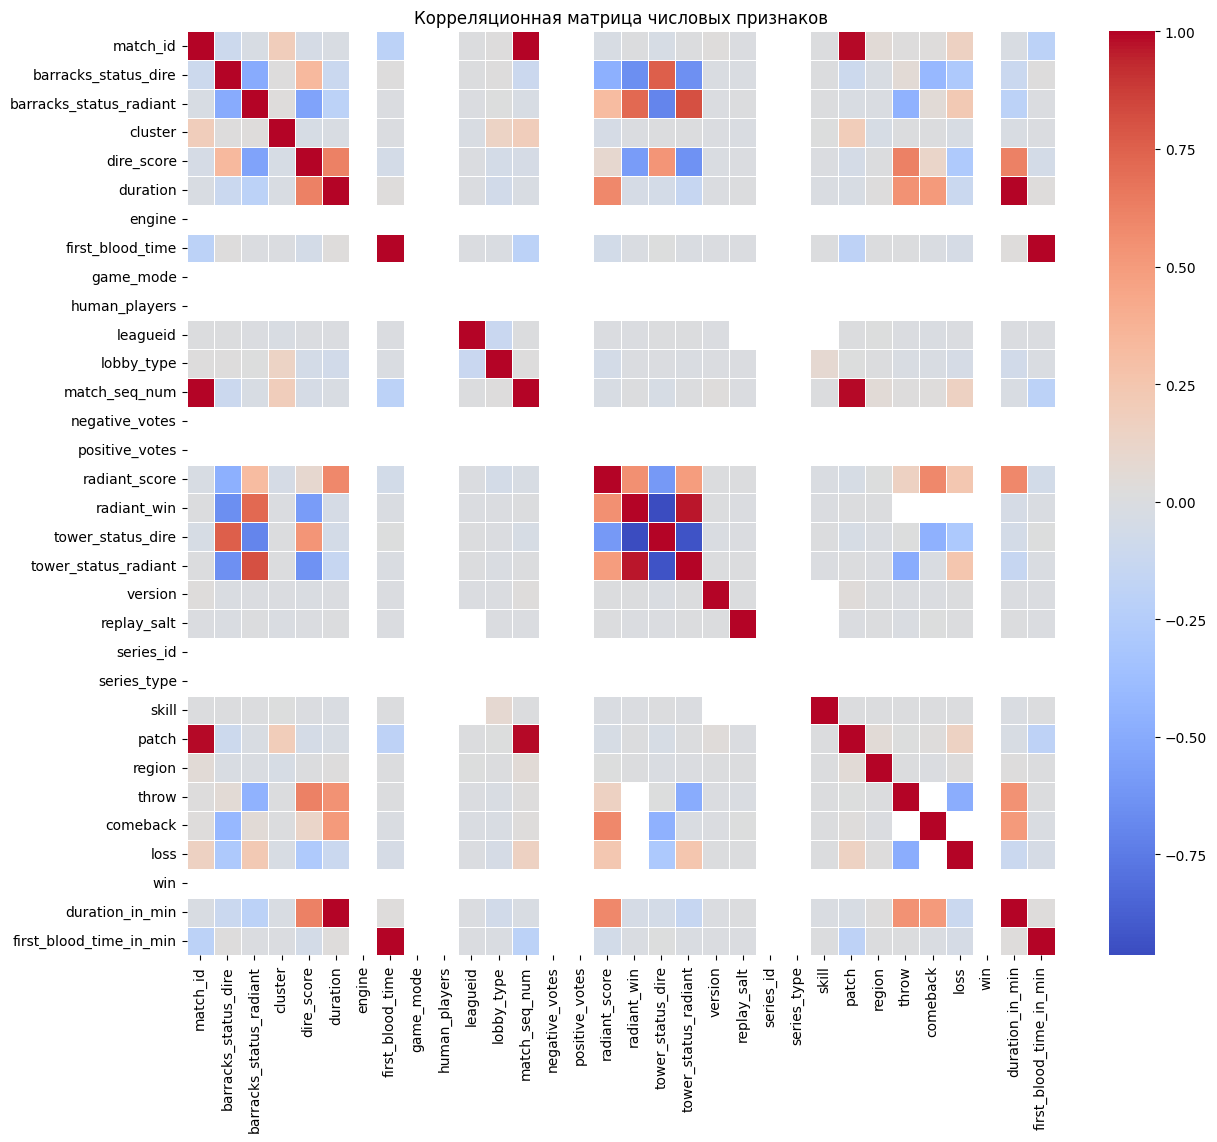

In [32]:
plt.figure(figsize=(14, 12))
sns.heatmap(general_df.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=.5)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

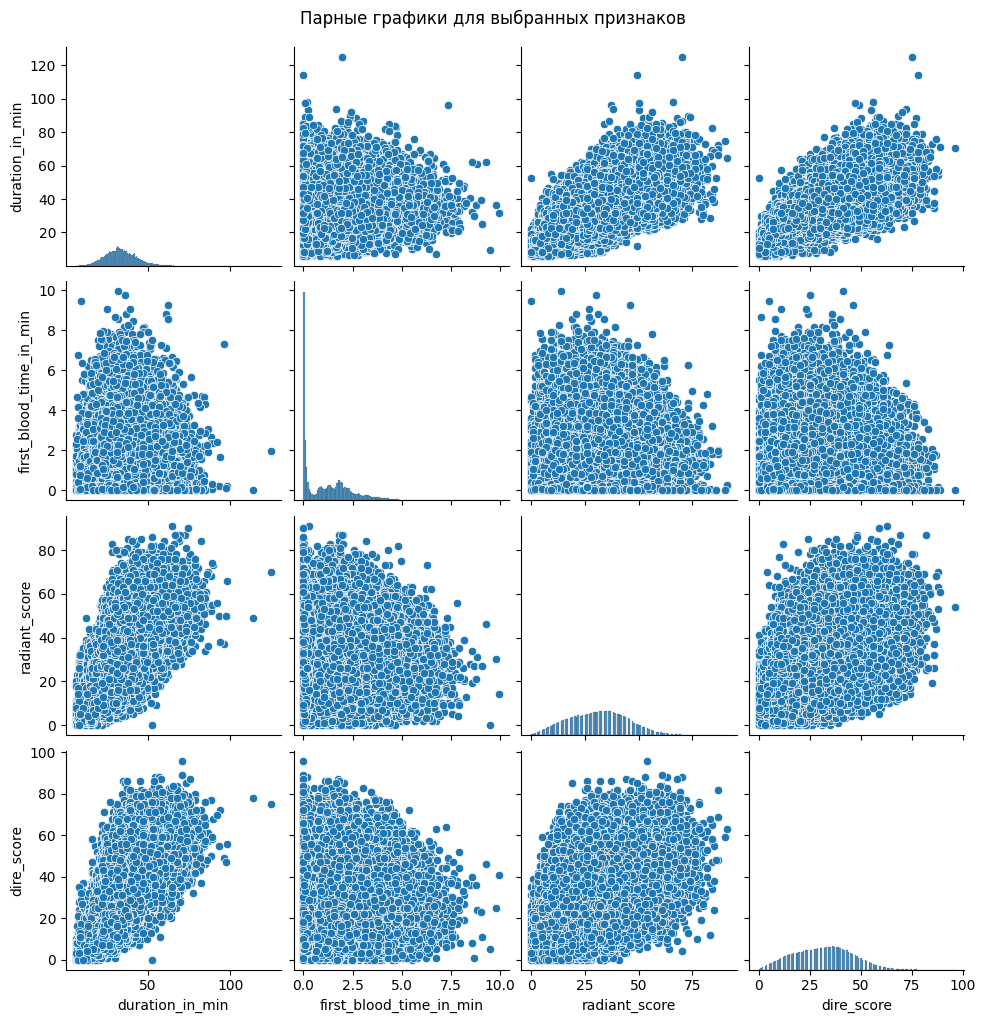

In [34]:
# Парные графики для подмножества признаков
sample_cols = ['duration_in_min', 'first_blood_time_in_min', 'radiant_score', 'dire_score']

sns.pairplot(general_df[sample_cols].dropna())
plt.suptitle("Парные графики для выбранных признаков", y=1.02)
plt.show()

Посмотрим на распределения некоторых особенно интересных признаков

/var/folders/h9/0y8pddws5r74cd3l8tn5h53m0000gn/T/ipykernel_10431/2921085890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=general_df, palette='pastel')


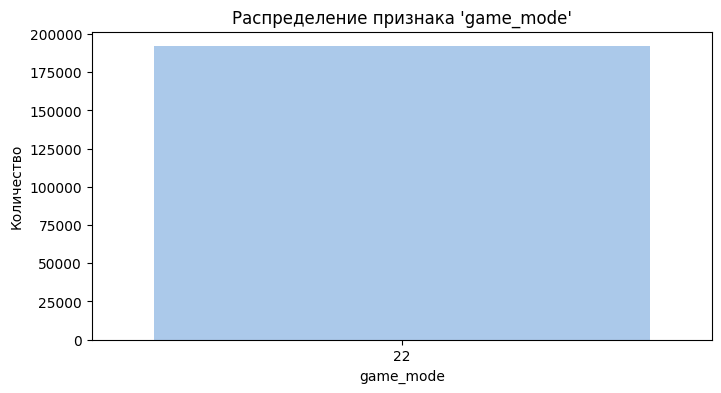

/var/folders/h9/0y8pddws5r74cd3l8tn5h53m0000gn/T/ipykernel_10431/2921085890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=general_df, palette='pastel')



Значения game_mode:
game_mode
22    191967
Name: count, dtype: int64


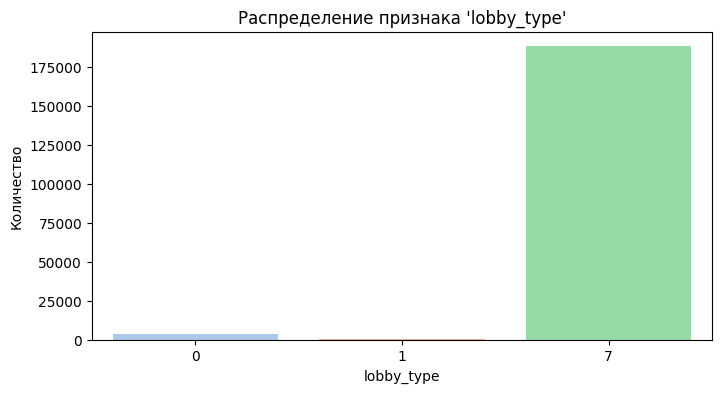


Значения lobby_type:
lobby_type
7    188007
0      3863
1        97
Name: count, dtype: int64


/var/folders/h9/0y8pddws5r74cd3l8tn5h53m0000gn/T/ipykernel_10431/2921085890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=general_df, palette='pastel')


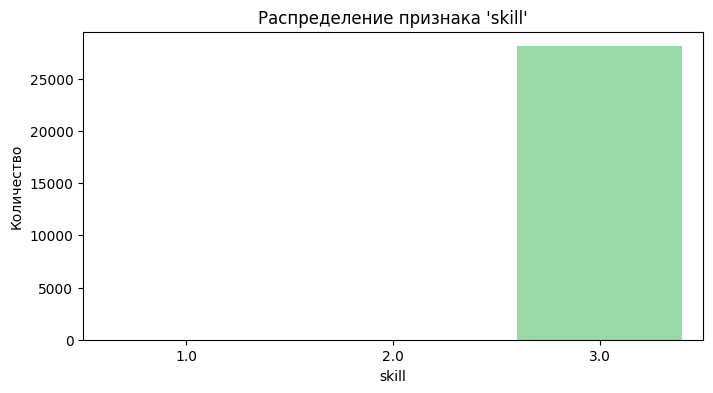


Значения skill:
skill
NaN    163852
3.0     28108
2.0         5
1.0         2
Name: count, dtype: int64


In [38]:
# Анализ распределения game_mode, lobby_type, skill
for col in ['game_mode', 'lobby_type', 'skill']:
    if col in general_df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=general_df, palette='pastel')
        plt.title(f"Распределение признака '{col}'")
        plt.xlabel(col)
        plt.ylabel("Количество")
        plt.show()
        print(f"\nЗначения {col}:")
        print(general_df[col].value_counts(dropna=False))

Избавимся от малочисленных данных. Почему - потому что, например, lobby_type = 7 - релевантный для нас режим 5х5. Другие могут быть кастомными и т.д. Game Mode отвечает тоже за подходящий режим - у нас он верный, везде 22. Skill равен 2 и 1 в нескольких случаях, можно ими пренеберчь для чистоты данных

In [49]:
mask_general = (
    (general_df['lobby_type'] == 7) & 
    (general_df['game_mode'] == 22) & 
    (general_df['skill'].isin([3.0]))
)
general_df = general_df[mask_general]

mask_data = (
    (data['lobby_type'] == 7) & 
    (data['game_mode'] == 22) & 
    (data['skill'].isin([3.0]))
)
data = data[mask_data]

Распределение класса radiant_win:
radiant_win
True     96847
False    95120
Name: count, dtype: int64


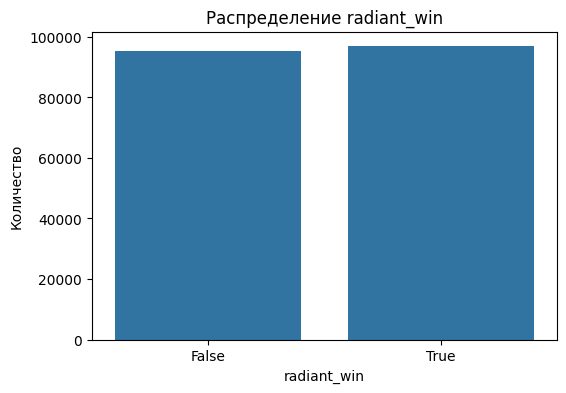

In [62]:
if 'radiant_win' in data.columns:
    print("Распределение класса radiant_win:")
    radiant_win_counts = data['radiant_win'].value_counts(dropna=False)
    print(radiant_win_counts)
    
    plt.figure(figsize=(6,4))
    sns.countplot(x='radiant_win', data=data)
    plt.title("Распределение radiant_win")
    plt.xlabel("radiant_win")
    plt.ylabel("Количество")
    plt.show()

Таргет распределен равномерно, что логично. Игра за ту или иную сторону не дает никаких преимуществ в Dota 2

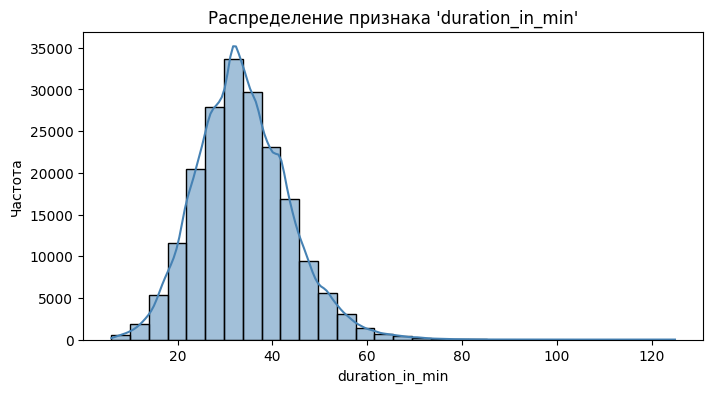

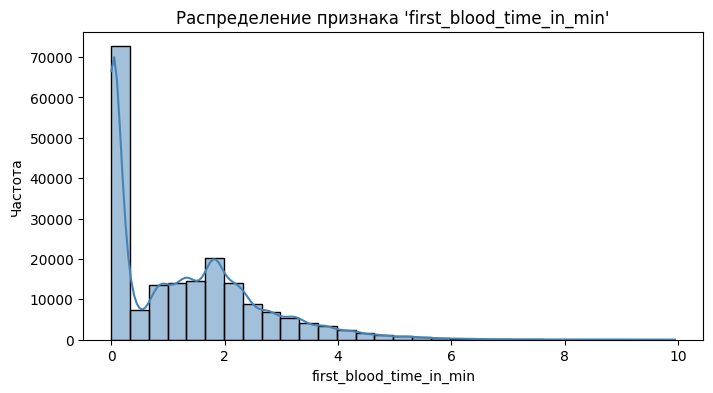

In [87]:
continuous_columns = ['duration_in_min', 'first_blood_time_in_min', 'dire_score', 'radiant_score']

for col in continuous_columns:
    if col in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col].dropna(), bins=30, kde=True, color='steelblue')
        plt.title(f"Распределение признака '{col}'")
        plt.xlabel(col)
        plt.ylabel("Частота")
        plt.show()

Все выглядит правдиво. Игры действительно чаще всего длятся около 35 минут, но при этом есть хвостик, выбросы - игры, которые длятся даже более двух часов

Время первой крови - чаще всего она происходит в самом начале игры, однако не редки и случаи, когда это происходит лишь на 3-5 минутах. 